In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import os

if 'COLAB_GPU' in os.environ:
    !git clone https: // github.com / impulsecorp / PickStocks.git
    !mv PickStocks / *.py.
    !mv PickStocks / data.
    !pip install -qq -r PickStocks / requirements.txt
    !pip install -qq scikit-optimize

In [3]:
import warnings
warnings.filterwarnings("ignore")
import system
from system import *
from datablock import *
from backtesting import Backtest
from datetime import datetime, timedelta
seed

Loading BokehJS ...

412509

In [4]:
data_timeperiod = '5min'
data = get_data('SPY', period=data_timeperiod, nrows=None)
data = procdata_lite(data)

Loading.. Done.
Computing features.. Done.


In [5]:
# for inspectiion
# data[0:20]
# print(get_data_features(data))
data.shape

(39118, 53)

In [6]:
from sklearn.linear_model import LogisticRegression

clf_class = LogisticRegression

In [7]:
system.test_size = 0.5
system.opt_test_end = 0.7

clf_class = LogisticRegression
feature_name = 'hour'

In [8]:
# the time search space
start_time = datetime.strptime('09:30', '%H:%M')
end_time = datetime.strptime('16:00', '%H:%M')
time_interval = timedelta(minutes=int(data_timeperiod.replace('min','')))
current_time = start_time
time_list = []
while current_time <= end_time:
    time_list.append(current_time.time())
    current_time += time_interval
time_list = time_list[:-2]

display([x.strftime('%H:%M') for x in time_list])

['09:30', '09:35', '09:40', '09:45', '09:50', '09:55', '10:00', '10:05', '10:10', '10:15', '10:20', '10:25', '10:30', '10:35', '10:40', '10:45', '10:50', '10:55', '11:00', '11:05', '11:10', '11:15', '11:20', '11:25', '11:30', '11:35', '11:40', '11:45', '11:50', '11:55', '12:00', '12:05', '12:10', '12:15', '12:20', '12:25', '12:30', '12:35', '12:40', '12:45', '12:50', '12:55', '13:00', '13:05', '13:10', '13:15', '13:20', '13:25', '13:30', '13:35', '13:40', '13:45', '13:50', '13:55', '14:00', '14:05', '14:10', '14:15', '14:20', '14:25', '14:30', '14:35', '14:40', '14:45', '14:50', '14:55', '15:00', '15:05', '15:10', '15:15', '15:20', '15:25', '15:30', '15:35', '15:40', '15:45', '15:50']


  0%|          | 0/20 [00:00<?, ?it/s]

CPU times: total: 1min 26s
Wall time: 1min 20s


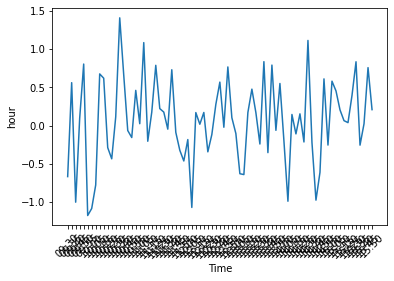

In [9]:
%%time

MLSingleParamTimeEqStrategy.optimizing = True

bt = Backtest(data, MLSingleParamTimeEqStrategy, **btkw)
consts = dict(clf_class=[clf_class], period=[data_timeperiod], feature_name=[featformat(feature_name)])
results = bt.optimize(**consts, **optkw,
                      target=time_list)
plot_optresult(get_optdata(results, consts), feature_name);

MLSingleParamTimeEqStrategy.optimizing = False

In [10]:
display(get_optdata(results, consts))

target
09:30:00   -0.665831
09:35:00    0.563154
09:40:00   -1.000554
09:45:00    0.097521
09:50:00    0.806750
09:55:00   -1.174953
10:00:00   -1.083174
10:05:00   -0.775629
10:10:00    0.677721
10:15:00    0.621383
10:20:00   -0.286808
10:25:00   -0.433039
10:30:00    0.115845
10:35:00    1.411379
10:40:00    0.662659
10:45:00   -0.062838
10:50:00   -0.154700
10:55:00    0.462277
11:00:00    0.026201
11:05:00    1.087253
11:10:00   -0.203325
11:15:00    0.178225
11:20:00    0.790223
11:25:00    0.223833
11:30:00    0.178102
11:35:00   -0.044860
11:40:00    0.732139
11:45:00   -0.086647
11:50:00   -0.320958
11:55:00   -0.461357
12:00:00   -0.181357
12:05:00   -1.069314
12:10:00    0.171871
12:15:00    0.019474
12:20:00    0.173238
12:25:00   -0.341636
12:30:00   -0.115510
12:35:00    0.279469
12:40:00    0.570540
12:45:00   -0.019912
12:50:00    0.768857
12:55:00    0.104447
13:00:00   -0.102417
13:05:00   -0.628046
13:10:00   -0.639262
13:15:00    0.172868
13:20:00    0.478404
13:25:

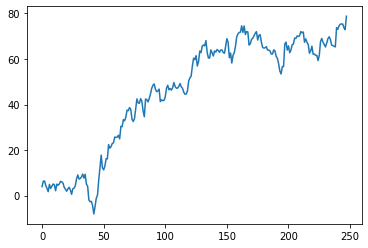

In [11]:
# performance of best backtest
plot_result(bt, results)

In [12]:
# stats for best backtest
display(results[0])

Start                     2021-03-10 09:30:00
End                       2023-02-27 16:00:00
Duration                    719 days 06:30:00
Exposure Time [%]                    1.267958
Equity Final [$]                 10078.755818
Equity Peak [$]                  10078.755818
Return [%]                           0.787558
Buy & Hold Return [%]                5.124285
Return (Ann.) [%]                    0.399358
Volatility (Ann.) [%]                0.280921
Sharpe Ratio                         1.421606
Sortino Ratio                        2.328021
Calmar Ratio                          1.89375
Max. Drawdown [%]                   -0.210882
Avg. Drawdown [%]                   -0.039425
Max. Drawdown Duration      115 days 00:05:00
Avg. Drawdown Duration       10 days 22:24:00
# Trades                                  248
Win Rate [%]                        54.032258
Best Trade [%]                       0.613104
Worst Trade [%]                     -0.376137
Avg. Trade [%]                    

In [13]:
gr = get_optdata(results, consts)
best_timeofday = gr.index[np.argmax(gr.values)]
best_timeofday, np.max(gr.values)

(datetime.time(10, 35), 1.411379011005174)

In [14]:
# Here is the ensemble variant as well

In [ ]:
%%time

MLEnsembleParamEqStrategy.num_clfs = 10
MLEnsembleParamEqStrategy.dropout = 0.05

bt = Backtest(data, MLEnsembleParamTimeEqStrategy, **btkw)
consts = dict(clf_class=[clf_class], period=[data_timeperiod],
              feature_name=[feature_name])
results = bt.optimize(**consts, **optkw,
                      target=time_list)
plot_optresult(get_optdata(results, consts), feature_name);

  0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
# performance of best backtest
plot_result(bt, results)

In [ ]:
# stats for best backtest
display(results[0])

In [ ]:
gr = get_optdata(results, consts)
best_timeofday_ens = gr.index[np.argmax(gr.values)]
best_timeofday_ens

In [ ]:
# This tests a variant of the strategy based on the "hour of day" indicator

In [ ]:
feature_name = 'hour'

In [ ]:
%%time

# search space boundaries
sp_min = 9
sp_max = 16

bt = Backtest(data, MLSingleParamEqStrategy, **btkw)
consts = dict(clf_class=[clf_class], period=[data_timeperiod], feature_name=[featformat(feature_name)])
results = bt.optimize(**consts, **optkw,
                      target=np.arange(sp_min, sp_max).tolist())
plot_optresult(get_optdata(results, consts), feature_name);

In [ ]:
# performance of best backtest
plot_result(bt, results)

In [ ]:
# stats for best backtest
display(results[0])

In [ ]:
gr = get_optdata(results, consts)
best_timeofday = gr.index[np.argmax(gr.values)]
best_timeofday, np.max(gr.values)

In [ ]:
# And the ensemble version of that

In [ ]:
%%time

# search space boundaries
sp_min = 9
sp_max = 16

bt = Backtest(data, MLEnsembleParamEqStrategy, **btkw)
consts = dict(clf_class=[clf_class], period=[data_timeperiod], feature_name=[featformat(feature_name)])
results = bt.optimize(**consts, **optkw,
                      target=np.arange(sp_min, sp_max).tolist())
plot_optresult(get_optdata(results, consts), feature_name);

In [ ]:
# performance of best backtest
plot_result(bt, results)

In [ ]:
# stats for best backtest
results[0]

In [ ]:
gr = get_optdata(results, consts)
best_timeofday = gr.index[np.argmax(gr.values)]
best_timeofday, np.max(gr.values)